# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv("/content/5_a.csv") 
data.shape



(10100, 2)

In [0]:
def label(proba):
  if proba>0.5:
    return 1.0
  else:
    return 0.0
data['Y_Pred'] = data.apply(lambda row:label(row.proba),axis=1)

# **Confusion Matrix**

In [9]:
TN=0
FN=0
FP=0
TP=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:    #actual value=0
    if data.iloc[i][2]==0:
      TN=TN+1
    elif data.iloc[i][2]==1:
      FP=FP+1
  elif data.iloc[i][0]==1:  #actual value=1
    if data.iloc[i][2]==0:
      FN=FN+1
    elif data.iloc[i][2]==1:
      TP=TP+1    
print(TN,FN,FP,TP)
print(len(data.Y_Pred))
    
    

0 0 100 10000
10100


In [10]:
#F1-score:
P=0
N=0
TPR=0
Pr=0
Re=0
F1=0
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==1:
    P=P+1
print(P)
for i in range(len(data.Y_Pred)):
  if data.iloc[i][0]==0:
    N=N+1
print(N)

TPR=TP/P
Re=TPR
print(TPR)
Pr=(TP/(TP+FP))
print(Pr)
F1=((Pr*Re*2)/(Pr+Re))
print(F1)

Accuracy=((TN+TP)/(len(data.Y_Pred)))
print(Accuracy)

10000
100
1.0
0.9900990099009901
0.9950248756218906
0.9900990099009901


In [11]:
Y_Unique=data['proba'].unique()
Y_Sorted=sorted(Y_Unique, reverse=True)
len(Y_Sorted)
print(Y_Sorted[2])

0.89982484614942


# **Threshold**

In [12]:
FPR=[]
TPR=[]
def label(proba,Y):
  if proba>Y:
    return 1.0
  else:
    return 0.0
num1=(len(Y_Sorted)/20) 
num2=int(num1)
for j in range(20):
  j=j*num2
  TP=0
  FP=0
  data['Y_Pred'] = data.apply(lambda row:label(row.proba,Y_Sorted[j]),axis=1)
  print(Y_Sorted[j])
  for i in range(len(data.Y_Pred)):
    if data.iloc[i][0]==0 and data.iloc[i][2]==1:
        FP=FP+1
    elif data.iloc[i][0]==1 and data.iloc[i][2]==1:
        TP=TP+1 
  #print(TP,FP)    
  TPR.append(TP/P)
  FPR.append(FP/N)
print(TPR)
print(FPR)

  
    

0.8999653487823838
0.8789433467386063
0.8586802522675053
0.8367123843724431
0.8152561086276665
0.7939112121227851
0.7727822752553082
0.7542612391647749
0.7350780957724631
0.7158581925180078
0.6970089962073902
0.6778537607355049
0.6592325052519856
0.6390345012312024
0.6197965132162059
0.600521990944984
0.5782148375959256
0.5596598747232789
0.5390419204554349
0.5189471886154078
[0.0, 0.0499, 0.0997, 0.1498, 0.2, 0.2499, 0.3001, 0.3498, 0.3997, 0.4499, 0.4998, 0.5497, 0.6001, 0.65, 0.6997, 0.7497, 0.7996, 0.8498, 0.9001, 0.9503]
[0.0, 0.06, 0.13, 0.17, 0.2, 0.26, 0.29, 0.37, 0.43, 0.46, 0.52, 0.58, 0.59, 0.65, 0.73, 0.78, 0.84, 0.87, 0.89, 0.92]


In [13]:
pAUC = np.trapz(TPR,FPR)
print(pAUC)

0.409868


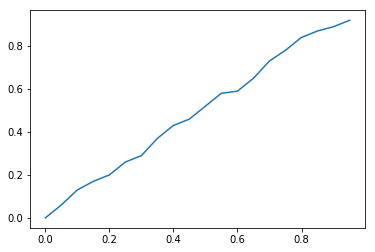

In [14]:
plt.plot(TPR,FPR)

In [39]:
data_d = pd.read_csv("/content/5_d.csv") 
data_d['Y_err'] = data_d.apply(lambda row:(row.y)-(row.pred),axis=1)#computing (y-y_pred)
data_d.head()
SOE=0
for i in range(len(data_d.Y_err)):
  SOE=SOE+(data_d.Y_err[i])*(data_d.Y_err[i])#sum of sq (y-y_pred)
MSE=(SOE/(len(data_d.Y_err)))#MSE
print(SOE)
print(MSE)


27850448.0
177.16569974554707


# **R-Square:**

In [42]:
Sum=0
SS=0
for i in range(len(data_d.y)):
  Sum=Sum+data_d.y[i]
Avg=Sum/(len(data_d.y))  #computing Average
print(Sum,Avg)
data_d['Y_SS'] = data_d.apply(lambda row:(row.y)-(Avg),axis=1)#computing (y-y_Avg)
data_d.head()
for i in range(len(data_d.y)):
  SS=SS+(data_d.Y_SS[i])*(data_d.Y_SS[i])#sum of sq (y-y_Avg)
print(SS)  
  
  

10463560.0 66.56208651399491
638161080.035662


In [44]:
R2=1-(SOE/SS)#computing R-square
print(R2)

0.9563582786990964


In [28]:
datad.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{numebr of false positives} + 100 \times \text{numebr of false negatives}$

<pre>
   <b>Note 1:</b> in this data you can see number of positive points < number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [0]:
# write your code

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>